In [25]:
import numpy as np
import matplotlib.pyplot as plt

In [7]:
# Question 1

In [8]:
# Let q(t) = a0 + a1*t + a2*t^2 + a3*t^3 + a4*t^4
# As it was given that it is a degree 4 polynomial
#
#
# Constraints:
# For x:                                          For y:
# q(0) = 3           [starts at (3,0)]                 q(0) = 0
# q'(0) = 0          [starts at rest]                  q'(0) = 0
# q(5) = 9.          [tf = 5, ending pos: (9,5)]       q(5) = 5
# q'(5) = 0          [tf = 5, ending velocity: 0]      q'(5) = 0
# q(t1) = 1          [t1 cookie: (1,2.5)]              q(t1) = 2.5


In [9]:
# Helpers
def apply_a(a, t_val):
    degree = len(a) - 1
    total = 0
    for i in range(len(a)):
        temp = a[i] * (t_val**i)
        total += temp
    return total

def gen_output_t(a, t):
    ''' 
    Args:
        t (list) : is a list of the t values to be used
        a (list) : list of coefficients [a0, a1, a2...an]
    '''
    return [apply_a(a, t_val) for t_val in t]

def differentiate_a(a):
    a_new = [a[i] * i for i in range(len(a))]
    return a_new[1:]

In [10]:
tf = 5
t1 = 1.   # Hyperparameter to be changed
# To solve equation in the form M * a = b

# M array is constant across both x and y
M = np.array([
    [1, 0, 0, 0, 0],
    [0, 1, 0, 0, 0],
    [1, tf**1, tf**2, tf**3, tf**4],
    [0, 1, 2*tf, 3*tf**2, 4*tf**3],
    [1, t1, t1**2, t1**3, t1**4]
])
bx = np.array([[3], [0], [9], [0], [1]])
by = np.array([[0], [0], [5], [0], [2.5]])
Minv = np.linalg.inv(M)
ax = Minv @ bx
ay = Minv @ by
print("M=\n", M)
print("bx=\n", bx)
print("by=\n", by)
print("coefficients for ax:", ax)
print("coefficients for ay:", ay)

time = np.arange(0, 5.5, 0.1).tolist()
print("timesteps:", time)

M=
 [[  1.   0.   0.   0.   0.]
 [  0.   1.   0.   0.   0.]
 [  1.   5.  25. 125. 625.]
 [  0.   1.  10.  75. 500.]
 [  1.   1.   1.   1.   1.]]
bx=
 [[3]
 [0]
 [9]
 [0]
 [1]]
by=
 [[0. ]
 [0. ]
 [5. ]
 [0. ]
 [2.5]]
coefficients for ax: [[ 3.00000000e+00]
 [ 1.19904087e-15]
 [-3.38000000e+00]
 [ 1.54400000e+00]
 [-1.64000000e-01]]
coefficients for ay: [[ 0.00000000e+00]
 [ 6.66133815e-16]
 [ 3.69375000e+00]
 [-1.31750000e+00]
 [ 1.23750000e-01]]
timesteps: [0.0, 0.1, 0.2, 0.30000000000000004, 0.4, 0.5, 0.6000000000000001, 0.7000000000000001, 0.8, 0.9, 1.0, 1.1, 1.2000000000000002, 1.3, 1.4000000000000001, 1.5, 1.6, 1.7000000000000002, 1.8, 1.9000000000000001, 2.0, 2.1, 2.2, 2.3000000000000003, 2.4000000000000004, 2.5, 2.6, 2.7, 2.8000000000000003, 2.9000000000000004, 3.0, 3.1, 3.2, 3.3000000000000003, 3.4000000000000004, 3.5, 3.6, 3.7, 3.8000000000000003, 3.9000000000000004, 4.0, 4.1000000000000005, 4.2, 4.3, 4.4, 4.5, 4.6000000000000005, 4.7, 4.800000000000001, 4.9, 5.0, 5.1000000000

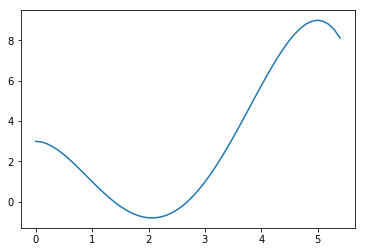

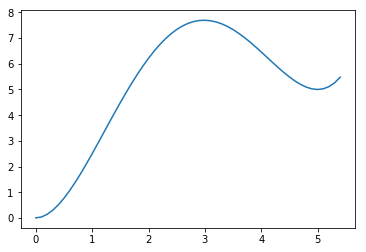

In [11]:

x = gen_output_t(ax, time)
y = gen_output_t(ay, time)
plt.plot(time, x) # x pos vs time,
plt.show()
plt.plot(time, y) # y pos vs time
plt.show()

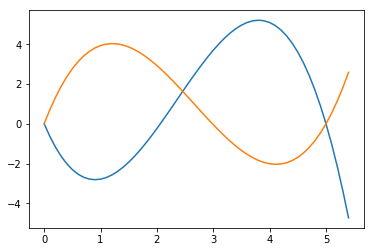

In [12]:
diff_ax = differentiate_a(ax)
diff_ay = differentiate_a(ay)
x_vel = gen_output_t(diff_ax, time)
y_vel = gen_output_t(diff_ay, time)
plt.plot(time, x_vel) # x velocity vs time
plt.plot(time, y_vel) # y velocity vs time
plt.show()

In [13]:
# Question 2

In [14]:
def nCr(n, r): 
    return (fact(n) / (fact(r)  * fact(n - r))) 
  
def fact(n): 
    res = 1
    for i in range(2, n+1): 
        res = res * i 
    return res 

# Reference: http://graphics.cs.ucdavis.edu/education/CAGDNotes/Bernstein-Polynomials.pdf
# Similar Reference: https://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.897.2894&rep=rep1&type=pdf 
def calc_bernstein(i, j, n):
    temp = (-1) ** (i-j)
    return temp * nCr(n, i) * nCr(i, j)

def make_bern(n):
    mat = []
    for i in range(n+1):
        temp = []
        for j in range(n+1):
            if i<j:
                temp.append(0)
            else:
                temp.append(calc_bernstein(i, j, n))
        mat.append(temp)
    return np.array(mat)

# B(t) = [1 t t^2...t^n] * make_bern(n) * [c0 c1 c2...cn] = [b0 b1 b2..bn]

In [18]:
poly_5 = make_bern(5)
def eval_pos(poly_5, t):
    temp = []
    for i in range(6):
        val = 0
        for j in range(6):
            val += poly_5[j][i] * t **j
        temp.append(val)
    return temp

def eval_vel(poly_5, t):
    temp = []
    for i in range(6):
        val = 0
        for j in range(6):
            if j-1 < 0:
                val += 0
            else: 
                val += j * poly_5[j][i] * t **(j-1)
        temp.append(val)
    return temp

def eval_acc(poly_5, t):
    temp = []
    for i in range(6):
        val = 0
        for j in range(6):
            if j-2 < 0:
                val += 0
            else:
                val += j * (j-1) * poly_5[j][i] * t **(j-2)
        temp.append(val)
    return temp
# at time 0, coefficients?
M = []
bx = []
by = []

coefs1 = eval_pos(poly_5, 0)
bx.append(3)
by.append(0)
M.append(coefs1)
flex_point_time = 2
coefs2 = eval_pos(poly_5, flex_point_time)
bx.append(1)
by.append(2.5)
M.append(coefs2)
coefs3 = eval_pos(poly_5, 5)
bx.append(9)
by.append(5)
M.append(coefs3)
coefs4 = eval_vel(poly_5, 0)
bx.append(0)
by.append(0)
M.append(coefs4)
coefs5 = eval_vel(poly_5, 5)
bx.append(0)
by.append(0)
M.append(coefs5)
coefs6 = eval_acc(poly_5, 5)
bx.append(0)
by.append(0)
M.append(coefs6)

In [19]:
M = np.array(M)
bx = np.array(bx)
by = np.array(by)
cx = np.linalg.inv(M) @ bx.T
cy = np.linalg.inv(M) @ by.T

In [20]:
def output_pos(poly_5, c, t):
    return np.array(eval_pos(poly_5, t)) @ c.T
def output_vel(poly_5, c, t):
    return np.array(eval_vel(poly_5, t)) @ c.T
def output_acc(poly_5, c, t):
    return np.array(eval_acc(poly_5, t)) @ c.T

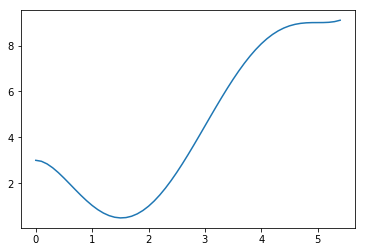

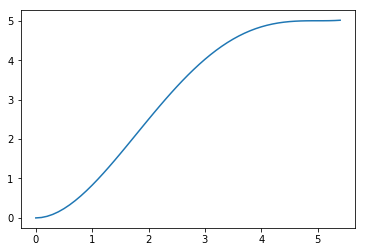

In [21]:
x = [output_pos(poly_5, cx, t) for t in time]
y = [output_pos(poly_5, cy, t) for t in time]
plt.plot(time, x) # Position x
plt.show()
plt.plot(time, y) # Position y
plt.show()

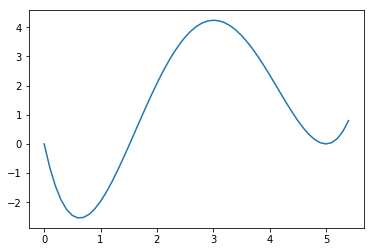

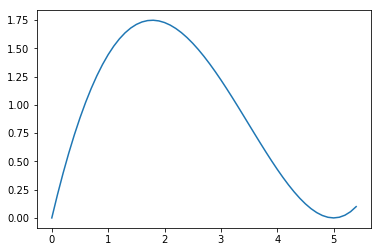

In [22]:
x = [output_vel(poly_5, cx, t) for t in time]
y = [output_vel(poly_5, cy, t) for t in time]
plt.plot(time, x) # Vel x
plt.show()
plt.plot(time, y) # Vel y
plt.show()

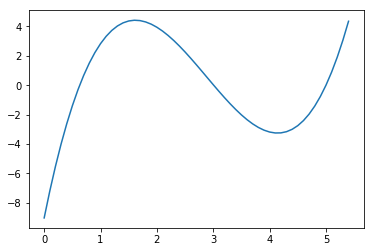

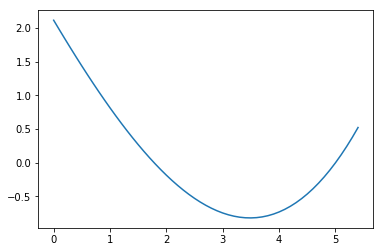

In [23]:
x = [output_acc(poly_5, cx, t) for t in time]
y = [output_acc(poly_5, cy, t) for t in time]
plt.plot(time, x) # Acc x
plt.show()
plt.plot(time, y) # Acc y
plt.show()

In [24]:
print(M)

[[ 1.0000e+00  0.0000e+00  0.0000e+00  0.0000e+00  0.0000e+00  0.0000e+00]
 [-1.0000e+00  1.0000e+01 -4.0000e+01  8.0000e+01 -8.0000e+01  3.2000e+01]
 [-1.0240e+03  6.4000e+03 -1.6000e+04  2.0000e+04 -1.2500e+04  3.1250e+03]
 [-5.0000e+00  5.0000e+00  0.0000e+00  0.0000e+00  0.0000e+00  0.0000e+00]
 [-1.2800e+03  7.6800e+03 -1.8400e+04  2.2000e+04 -1.3125e+04  3.1250e+03]
 [-1.2800e+03  7.3600e+03 -1.6880e+04  1.9300e+04 -1.1000e+04  2.5000e+03]]
